# Covid-19 India Data Analysis

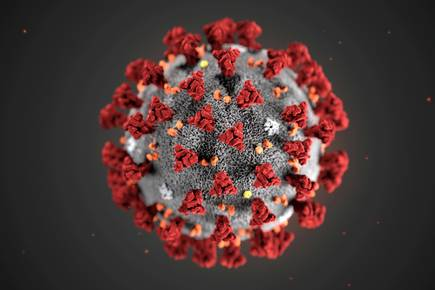

Data set is collected from kaggle:https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset

**Context**:

  - January 30 The first case of the COVID-19 in India was reported, originating from China.
  - March 14: Central government declares COVID-19 a 'notified disaster'
  - March 15: The number of positive cases crosses 100
  - March 24: Prime Minister Narendra Modi announces 21-day lockdown
  - March 30: The number of positive cases crosses 1000

**Aim**
    
  - This Project Completely focuses on Data analysis of Covid19 in India.
  - Let's Perform Various Analysis inorder to find the insights behind how rampant covid19 in India.
    

### Importing Necessary Libraries




In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

### Reading CSV

In [2]:
df=pd.read_csv("Data/complete.csv",parse_dates=True,index_col='Date')

In [3]:
df.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [4]:
df.tail()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-07-10,Telangana,18.1124,79.0193,30946,331,18192,1410,7,913
2020-07-10,Tripura,23.9408,91.9882,1776,1,1338,15,0,14
2020-07-10,Uttar Pradesh,26.8467,80.9462,32362,862,21127,1206,17,796
2020-07-10,Uttarakhand,30.0668,79.0193,3305,46,2672,47,0,22
2020-07-10,West Bengal,22.9868,87.8550,25911,854,16826,1088,27,535


In [5]:
nation = pd.read_csv('Data/nation_level_daily.csv')

In [6]:
nation.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [7]:
nation.shape

(162, 7)

In [8]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [9]:
def date(dt):
    l=dt.strip().split()
    if(l[1]=='January'):
        return '2020/01/'+l[0]
    elif(l[1]=='February'):
        return '2020/02/'+l[0]
    elif(l[1]=='March'):
        return '2020/03/'+l[0]
    elif(l[1]=='April'):
        return '2020/04/'+l[0]
    elif(l[1]=='May'):
        return '2020/05/'+l[0]
    elif(l[1]=='June'):
        return '2020/06/'+l[0]
    elif(l[1]=='July'):
        return '2020/07/'+l[0]
        

In [10]:
nation['Date']=nation['Date'].apply(date)

In [11]:
l='01 January'.split()

In [12]:
nation.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020/01/30,1,1,0,0,0,0
1,2020/01/31,0,1,0,0,0,0
2,2020/02/01,0,1,0,0,0,0
3,2020/02/02,1,2,0,0,0,0
4,2020/02/03,1,3,0,0,0,0


In [13]:
nation['Date']=pd.to_datetime(nation['Date'])

In [14]:
nation.index=nation['Date']

In [15]:
nation.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09'],
              dtype='datetime64[ns]', name='Date', length=162, freq=None)

In [16]:
nation.drop('Date',axis=1,inplace=True)

In [65]:
nation.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2020-01-30,1,1,0,0,0,0
2020-01-31,0,1,0,0,0,0
2020-02-01,0,1,0,0,0,0
2020-02-02,1,2,0,0,0,0
2020-02-03,1,3,0,0,0,0


In [111]:
nation_test = pd.read_csv('Data/tests_day_wise.csv')

In [112]:
nation_test.tail()

,Update Time Stamp,Tested As Of,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Source 1,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case,Tests per million
117,06/07/2020 09:00:00,05/07/2020,9969662.0,NaN,NaN,NaN,180596,NaN,https://twitter.com/ICMRDELHI/status/127998009...,https://t.me/Covid19india_Auxiliary_Test_Data/946,NaN,NaN,NaN,7480.0
118,07/07/2020 09:00:00,06/07/2020,10211092.0,NaN,NaN,NaN,241430,NaN,https://twitter.com/ICMRDELHI/status/128034776...,https://t.me/Covid19india_Auxiliary_Test_Data/975,NaN,NaN,NaN,7661.0
119,08/07/2020 09:00:00,07/07/2020,10473771.0,NaN,NaN,NaN,262679,NaN,https://twitter.com/ICMRDELHI/status/128070760...,https://t.me/Covid19india_Auxiliary_Test_Data/...,NaN,NaN,NaN,7858.0
120,09/07/2020 09:00:00,08/07/2020,10740832.0,NaN,NaN,NaN,267061,NaN,https://twitter.com/ICMRDELHI/status/128106822...,https://t.me/Covid19india_Auxiliary_Test_Data/...,NaN,NaN,NaN,8058.0
121,10/07/2020 09:00:00,09/07/2020,11024491.0,NaN,NaN,NaN,283659,NaN,https://twitter.com/ICMRDELHI/status/128143646...,https://t.me/Covid19india_Auxiliary_Test_Data/...,NaN,NaN,NaN,8271.0


In [114]:
nation_test['Update Time Stamp']=nation_test['Update Time Stamp'].apply(lambda x:x.split()[0])

In [115]:
nation_test.index=nation_test['Update Time Stamp']


In [116]:
nation_test.drop(['Update Time Stamp','Tested As Of'],axis=1,inplace=True)

In [117]:
nation_test.head()

,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Source 1,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case,Tests per million
Update Time Stamp,,,,,,,,,,,,
13/03/2020,6500.0,5900.0,78,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.20%,75.64,83.33,5.0
18/03/2020,13125.0,12235.0,150,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.14%,81.57,87.50,10.0
19/03/2020,13316.0,12426.0,168,NaN,NaN,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,1.26%,73.96,79.26,10.0
19/03/2020,14175.0,13285.0,182,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.28%,72.99,77.88,11.0
20/03/2020,14376.0,13486.0,206,NaN,NaN,NaN,ICMR_website_update_20March_10AM_IST.pdf,NaN,1.43%,65.47,69.79,11.0


In [119]:
nation_test.index.dt.strftime("%y%m%d")

AttributeError: 'Index' object has no attribute 'dt'

In [107]:
nation_test.index

DatetimeIndex(['2020-03-13', '2020-03-18', '2020-03-19', '2020-03-19',
               '2020-03-20', '2020-03-20', '2020-03-21', '2020-03-21',
               '2020-03-22', '2020-03-22',
               ...
               '2020-01-07', '2020-02-07', '2020-03-07', '2020-04-07',
               '2020-05-07', '2020-06-07', '2020-07-07', '2020-08-07',
               '2020-09-07', '2020-10-07'],
              dtype='datetime64[ns]', name='Update Time Stamp', length=122, freq=None)

## Pan India Analysis

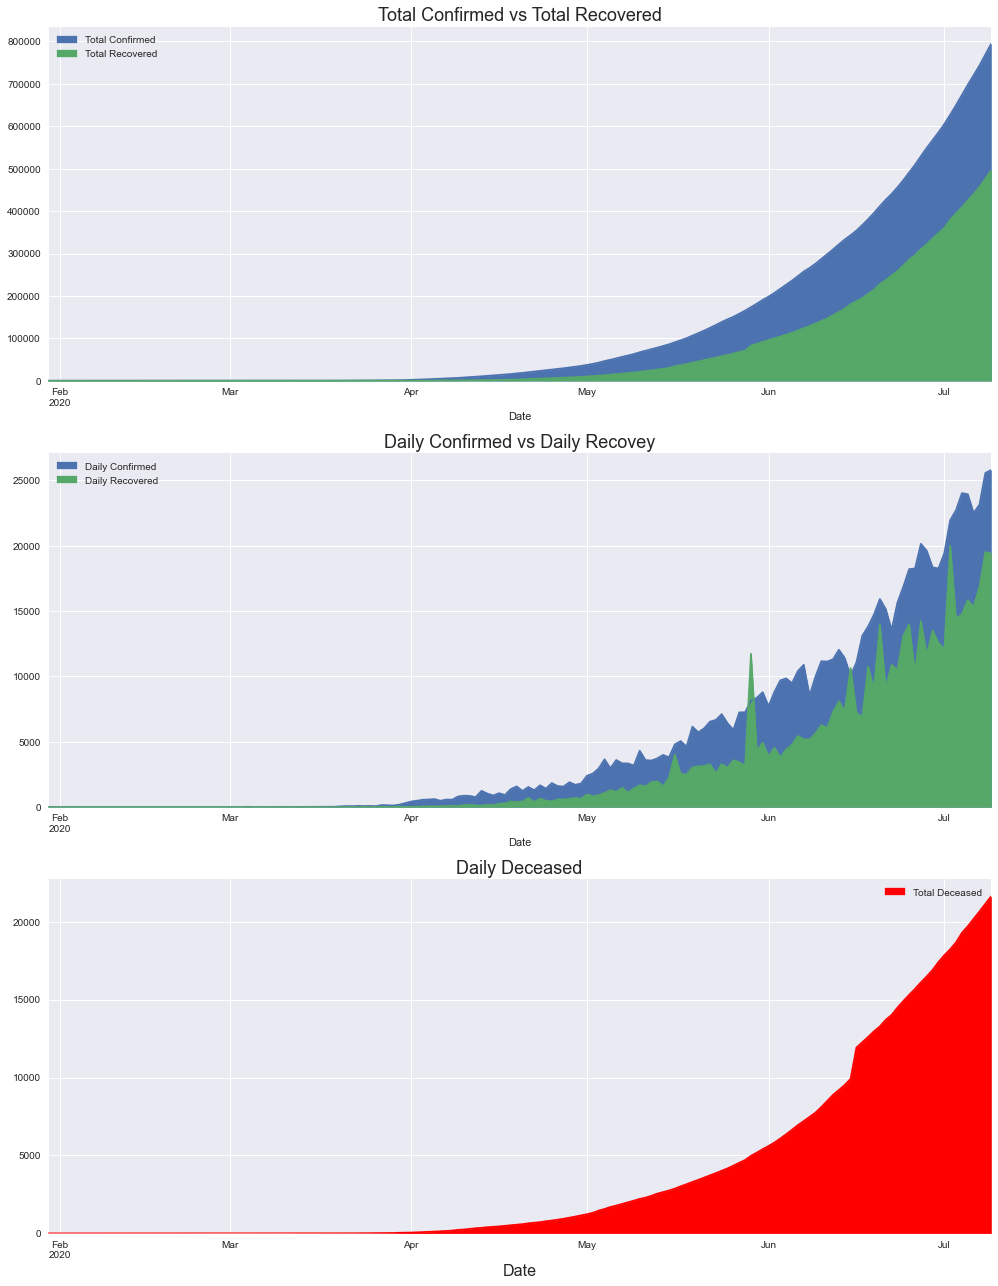

In [64]:
plt.style.use('seaborn')
plt.figure(figsize=(14,18))
#Total Confirmed vs Total Recovery
plt.subplot(3,1,1)
nation['Total Confirmed'].plot.area(legend=True)
nation['Total Recovered'].plot.area(legend=True)
plt.title('Total Confirmed vs Total Recovered',fontsize=18);
plt.tight_layout(pad=1.2)
#Daily Confirmed vs Daily Recoveabsry
plt.subplot(3,1,2)
nation['Daily Confirmed'].plot.area(legend=True)
nation['Daily Recovered'].plot.area(legend=True)
plt.title('Daily Confirmed vs Daily Recovey',fontsize=18);
plt.tight_layout(pad=1.2)
#
plt.subplot(3,1,3)
nation['Total Deceased'].plot.area(legend=True,color='red')
plt.xlabel('Date',fontsize=16)
plt.title('Daily Deceased',fontsize=18);
plt.tight_layout(pad=1.2)

plt.style.use('seaborn')
plt.figure(figsize=(16,8))
nation['Daily Confirmed'].plot.area(legend=True)
nation['Daily Recovered'].plot.area(legend=True)
plt.xlabel('Date',fontsize=18)
plt.title('Total Confirmed vs Total Recovered',fontsize=18);
plt.tight_layout();

**Let's Explore the Major affected states:**
 - Maharashtra
 - Tamilnadu
 - Delhi
 - Gujarat

## 1.Maharashtra

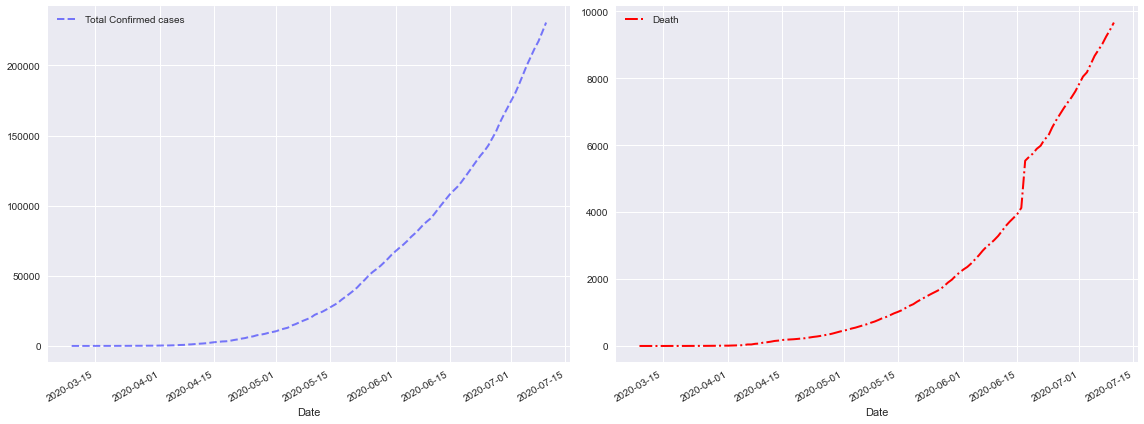

In [63]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Maharashtra"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Maharashtra"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='blue',alpha=0.5)
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

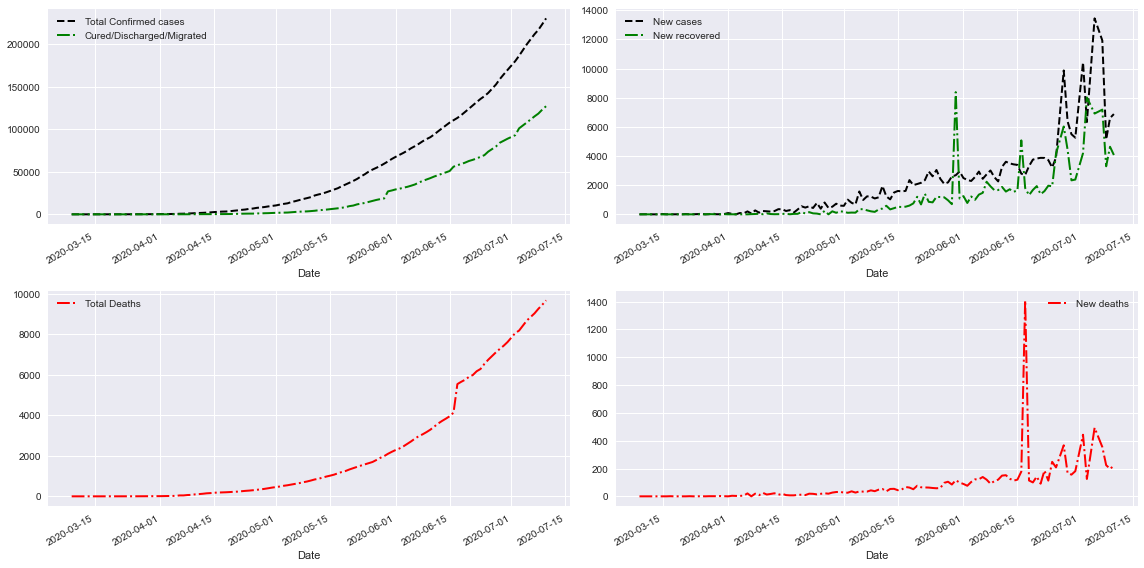

In [20]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Maharashtra"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Maharashtra"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Maharashtra"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Maharashtra"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Maharashtra"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Maharashtra"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 2.Tamil Nadu

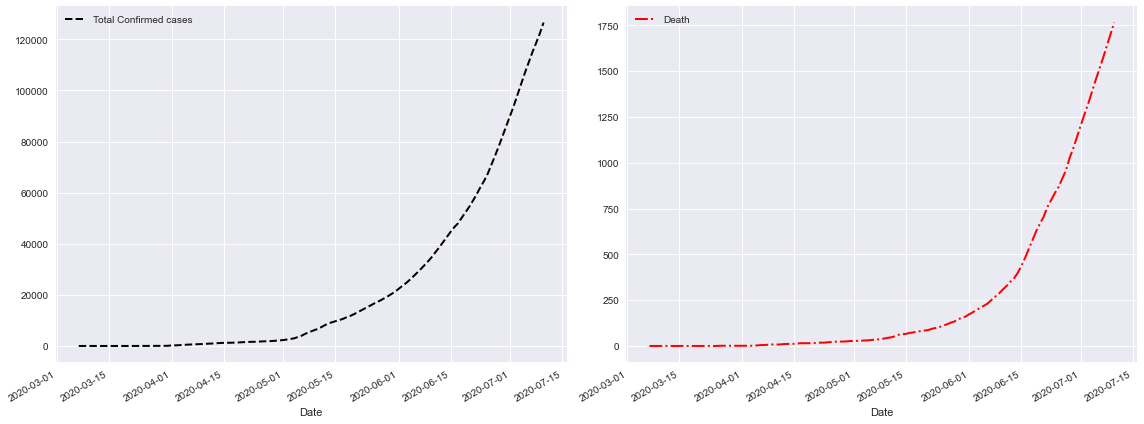

In [21]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Tamil Nadu"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Tamil Nadu"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

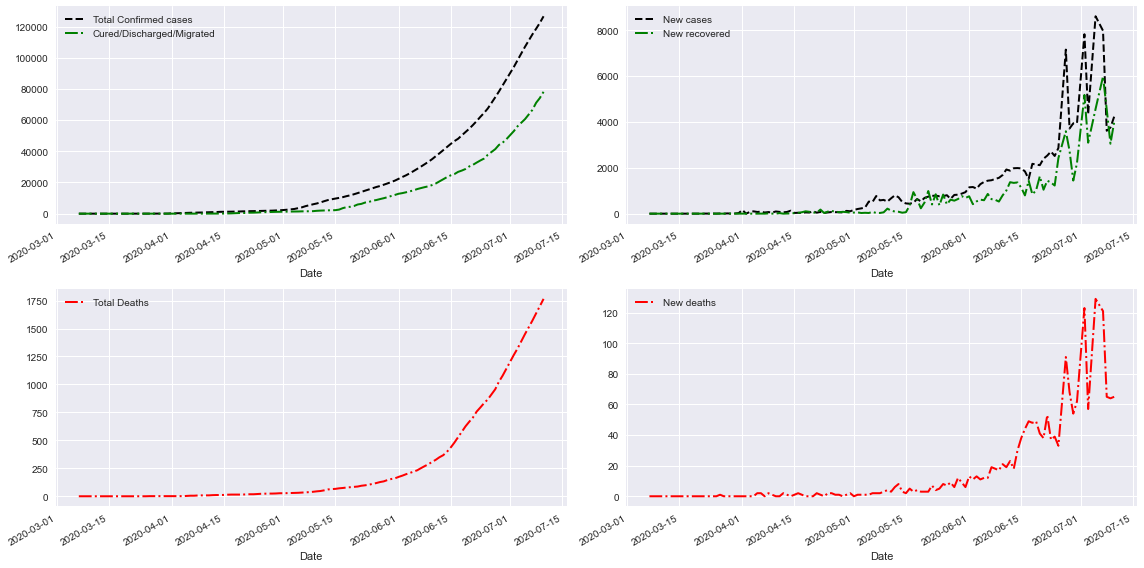

In [22]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Tamil Nadu"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Tamil Nadu"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Tamil Nadu"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Tamil Nadu"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Tamil Nadu"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Tamil Nadu"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 3.Delhi

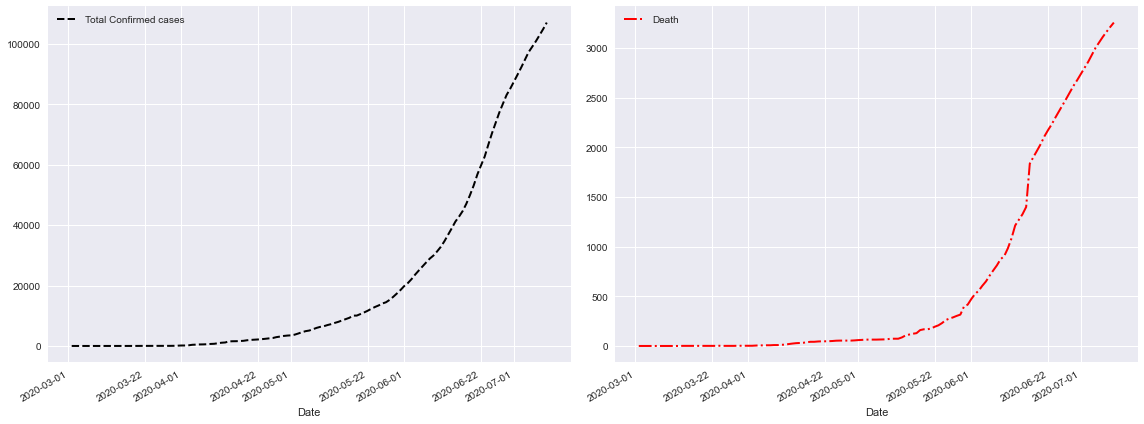

In [23]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Delhi"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Delhi"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',ls='--',lw=2,color='black')
plt.legend(loc="upper left")
plt.subplot(1,2,2)
death.plot(kind='line',cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.legend(loc="upper left")
plt.tight_layout()

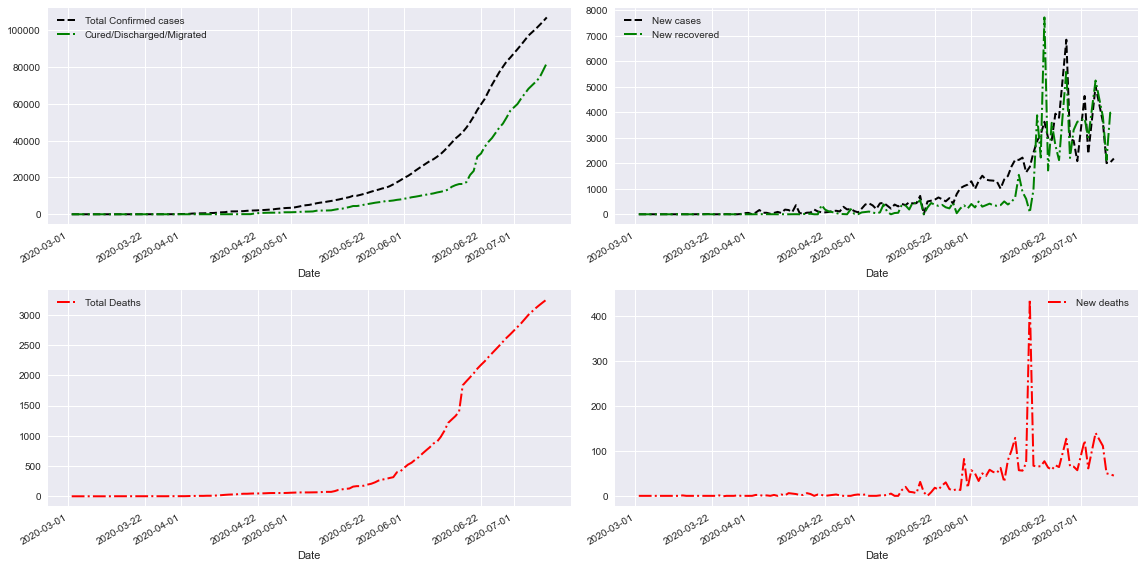

In [24]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Delhi"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Delhi"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Delhi"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Delhi"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Delhi"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Delhi"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

## 4.Gujarat

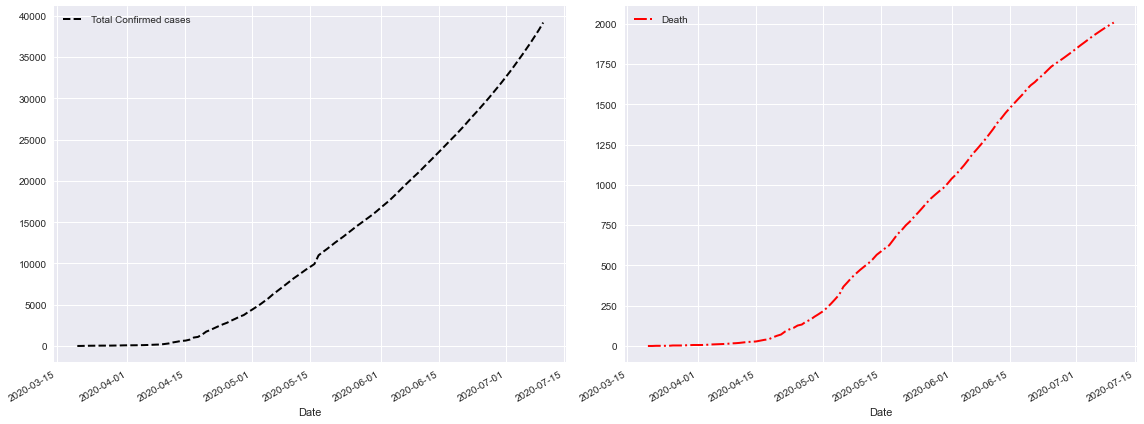

In [25]:
plt.figure(figsize=(16,6))
case=df[df['Name of State / UT']=="Gujarat"]["Total Confirmed cases"]
death=df[df['Name of State / UT']=="Gujarat"]["Death"]
plt.subplot(1,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
plt.subplot(1,2,2)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

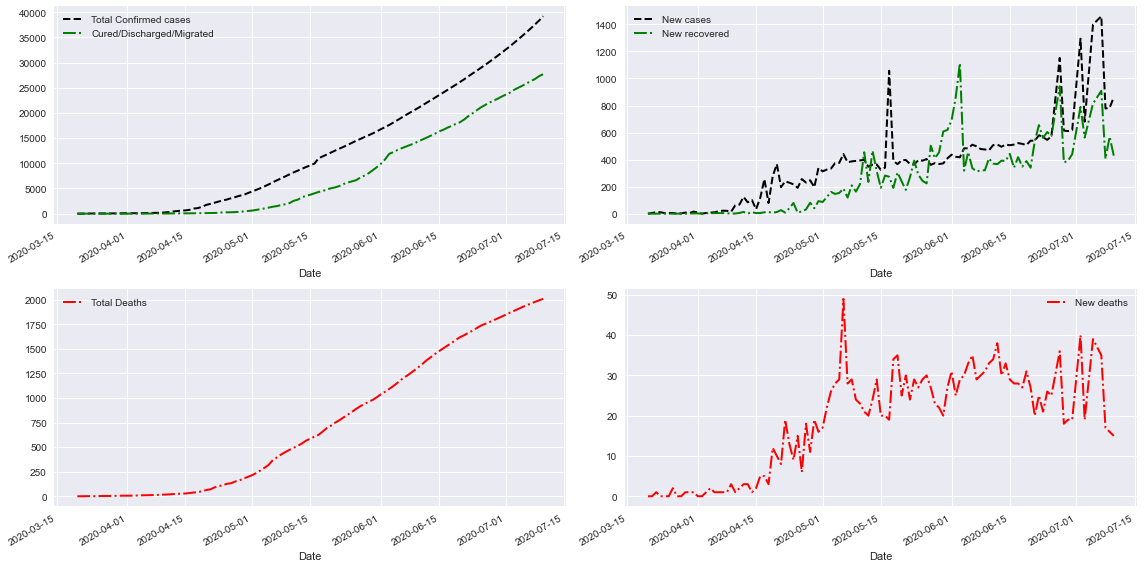

In [26]:
plt.figure(figsize=(16,8))
#Total Confirmed Cases
case=df[df['Name of State / UT']=="Gujarat"]["Total Confirmed cases"]
#Total Cured
cured=df[df['Name of State / UT']=="Gujarat"]["Cured/Discharged/Migrated"]
#Total Deaths
death=df[df['Name of State / UT']=="Gujarat"]["Death"]
#New cases per day
new_case=df[df['Name of State / UT']=="Gujarat"]["New cases"]
#New deaths per day
new_death=df[df['Name of State / UT']=="Gujarat"]["New deaths"]
#New recovery per day
new_recovery=df[df['Name of State / UT']=="Gujarat"]["New recovered"]
#Total Confirmed vs Total Cured
plt.subplot(2,2,1)
case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
cured.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#New cases per day vs Recovery per day
plt.subplot(2,2,2)
new_case.plot(kind='line',legend=True,ls='--',lw=2,color='black')
new_recovery.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='green');
#Total Deaths
plt.subplot(2,2,3)
death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red',label='Total Deaths');
#New Deaths
plt.subplot(2,2,4)
new_death.plot(kind='line',legend=True,cmap='coolwarm',ls='dashdot',lw=2,color='red');
plt.tight_layout()

In [27]:
df['Name of State / UT'].value_counts()

Kerala                                      159
Delhi                                       127
Haryana                                     125
Rajasthan                                   125
Uttar Pradesh                               125
Tamil Nadu                                  122
Punjab                                      120
Karnataka                                   120
Maharashtra                                 120
Andhra Pradesh                              117
Uttarakhand                                 114
Odisha                                      113
Puducherry                                  111
Chhattisgarh                                110
Gujarat                                     109
West Bengal                                 109
Himachal Pradesh                            108
Ladakh                                      108
Chandigarh                                  108
Madhya Pradesh                              108
Jammu and Kashmir                       

In [28]:
df

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,,
2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-07-10,Telangana,18.1124,79.0193,30946,331,18192,1410,7,913
2020-07-10,Tripura,23.9408,91.9882,1776,1,1338,15,0,14
2020-07-10,Uttar Pradesh,26.8467,80.9462,32362,862,21127,1206,17,796
